## Carga de Librerías

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

## Importamos el Data Frame

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Eliminamos NaNs y Valores Duplicados

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.duplicated().sum()

240

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## Visualizamos Info del Data Frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


## Búsqueda de correlaciones entre las diferentes Variables

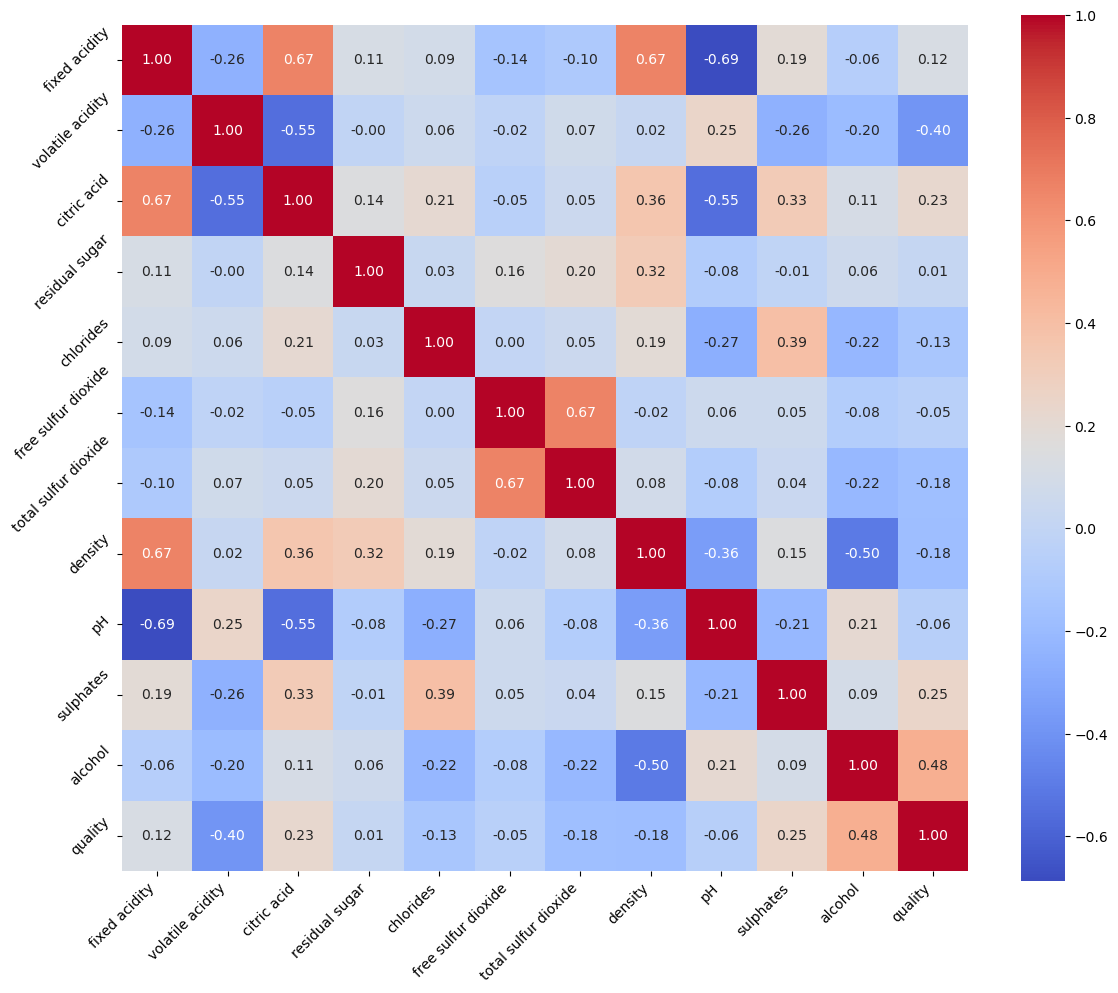

In [7]:
corr_matrix = df.corr()

# Genera el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Ajusta los ejes para que no corten la mitad de los ticks
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

# Muestra el gráfico
plt.show()

En este Heatmap podemos observar las correlaciones entre las distintas variables del data frame.

 - Con respecto a la variable objetivo (**quality**), podemos observar que las tres variables que guardan mayor relación son: alcohol, sulphates y citric acid, siendo alcohol la mayor con 0.48.
 
Tambien si observamos las variables independientes, podemos ver:

 - fixed acidity guarda una correlación de 0.67 con citric acid y density.
 - free sulfur dioxide y total sulfur dioxide guardan una correlación entre ellas de 0.67.
 - Con algo de menor tamaño pero también destacaremos es que sulphates y chlorides guardan una correlación de 0.39.



## Reduciremos la correlación entre variables independientes y el número de estas utilizando PCA en el preprocesamiento.
### No sin antes escalar y normalizar los datos para que los modelos estén centrados. Para preservar la forma de la distribución original utilizaremos MinMaxScaler.

In [8]:
preproces = make_pipeline(MinMaxScaler(), PCA(n_components=1))

In [9]:
df['C1']= preproces.fit_transform(df[['fixed acidity', 'citric acid', 'density']])
df.drop(columns=['fixed acidity', 'citric acid', 'density'], inplace=True)

In [10]:
df['C2']= preproces.fit_transform(df[['free sulfur dioxide', 'total sulfur dioxide']])
df.drop(columns=['free sulfur dioxide', 'total sulfur dioxide'], inplace=True)

In [11]:
df['C3']= preproces.fit_transform(df[['sulphates', 'chlorides']])
df.drop(columns=['sulphates', 'chlorides'], inplace=True)

## Volvemos a comprobar ahora la correlación

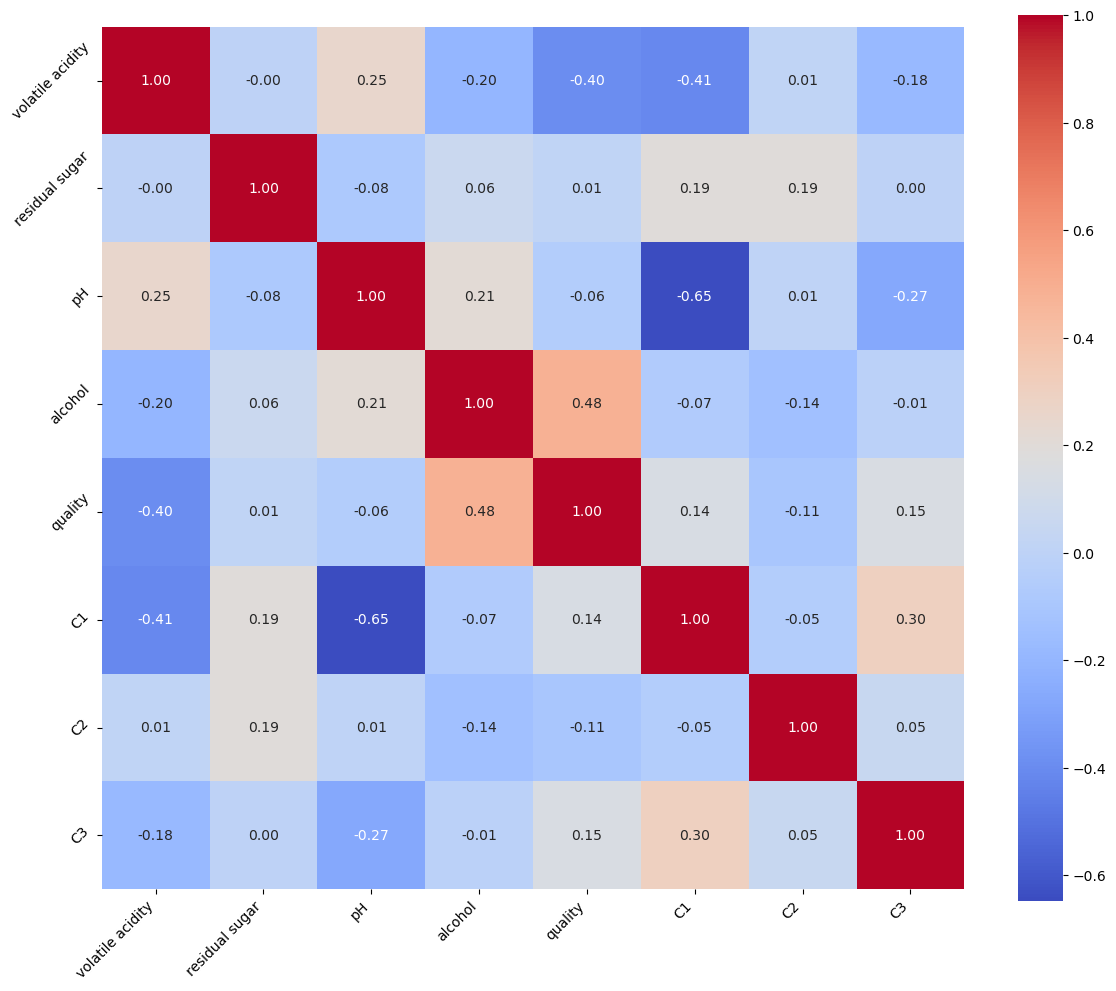

In [12]:
corr_matrix = df.corr()

# Genera el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Ajusta los ejes para que no corten la mitad de los ticks
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

# Muestra el gráfico
plt.show()

Ahora podemos observar que la correlación entre las variables ha bajado drásticamente sin perder demasiada información al respecto del data frame original.

## Comenzamos a formar el Modelo.

Como podemos observar la variable objetivo (**quality**) es una variable numérica donde podemos interpretar que recibe una puntuación 1 a 10. Como primer modelo vamos tratar de utilizar un modelo XG Boost de Regresión para tratar de predecir esta puntuación según las variables independientes que hemos procesado.

### Separamos del data frame las variables X y la variable objetivo Y.

In [13]:
X, y = df.drop(columns=['quality']), df['quality']

## Vamos a normalizar y escalar las variables independientes.
Usaremos MaxAbsScaler ya que es útil para mantener la dispersión relativa de los datos.

In [16]:
X_scal = MaxAbsScaler().fit_transform(X)

### Dividimos en train - test.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Definimos el modelo

In [18]:
model = XGBRegressor()
params={
    'n_estimators':[100,200,300],
    'learning_rate':[0.1,0.2,0.3],
    'max_depth':[4,8,12],
    'min_child_weight':[2,4,6]
}

scoring=['neg_mean_squared_error', 'explained_variance', 'r2']

grid=GridSearchCV(estimator=model, 
                  param_grid=params,
                  scoring=scoring,
                  refit='r2',
                  cv=3,
                  verbose=1)

In [20]:
#Entrenamos el modelo
model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [21]:
#Escogemos el mejor estimador y miramos las importancias de cada variable en él.
best_model=model.best_estimator_
importances=pd.DataFrame([X_test.columns,best_model.feature_importances_], index=["feature","importance"]).T
print(importances.sort_values("importance", ascending = False).head())

            feature importance
3           alcohol   0.386713
0  volatile acidity   0.176759
6                C3   0.156924
5                C2   0.079264
2                pH    0.07031


### Calculamos la predicción tanto en el train como en el test, y calculamos el r2 y el MSE a cada una para compararlas.

In [22]:
yhat=model.predict(X_test)
print('MSE:', mean_squared_error(y_true=y_test,y_pred=yhat))
print('R2 score:', r2_score(y_test, yhat))

MSE: 0.4303540925547291
R2 score: 0.3757486239595115


In [23]:
yhat=model.predict(X_train)
print('MSE:', mean_squared_error(y_true=y_train,y_pred=yhat))
print('R2 score:', r2_score(y_train, yhat))

MSE: 0.17718299243820496
R2 score: 0.7373653843259977


Por lo que podemos ver, difieren mucho los indicadores de la predicción en train (0.73 de r2 , 0.17 de MSE) de la predicción en test (0.37 de r2 , 0.43 de MSE). Esto nos está indicando un claro sobreajuste en el modelo, además de un bajo nivel de acierto en la predicción final de test.

Una posible solución podría ser categorizar la variable objetivo y utilizar un modelo de clasificación con el fin de facilitar y acotar la predicción hacia unos resultados más fiables y favorables.

### Usamos binning para convertir la variable objetivo en categórica.

In [29]:
bins = np.array([1,3,5.5,7,9])
categorias = ['malo', 'medio', 'bueno', 'excelente']
df['qlty-bin']=pd.cut(df['quality'], bins, labels=categorias)
df

,volatile acidity,residual sugar,pH,alcohol,quality,C1,C2,C3,qlty-bin
0,0.700,1.9,3.51,9.4,5,-0.214744,-0.082410,-0.061173,medio
1,0.880,2.6,3.20,9.8,5,-0.222287,0.145730,0.019371,medio
2,0.760,2.3,3.26,9.8,5,-0.187507,0.004622,-0.001190,medio
3,0.280,1.9,3.16,9.8,6,0.391460,0.039871,-0.051717,bueno
5,0.660,1.8,3.51,9.4,5,-0.214744,-0.047161,-0.062023,medio
...,...,...,...,...,...,...,...,...,...
1593,0.620,1.9,3.42,9.5,6,-0.222147,0.120066,0.066007,bueno
1594,0.600,2.0,3.45,10.5,5,-0.296895,0.178163,-0.038962,medio
1595,0.550,2.2,3.52,11.2,6,-0.291282,0.272598,0.029986,bueno
1597,0.645,2.0,3.57,10.2,5,-0.266974,0.178163,0.015274,medio


### Pasamos a dummies esta nueva variable categorica

In [26]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

### Separamos nuevamente train y test (esta vez como variable objetivo tendremos las dummies).

In [30]:
X, y = df.drop(columns=['quality', 'qlty-bin']), df_encoded[['qlty-bin_medio','qlty-bin_bueno','qlty-bin_excelente']]

In [39]:
#Volvemos a escalar X y dividir train y test
X_scal = MaxAbsScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2)

### Definimos el modelo

In [40]:
model = XGBClassifier()
params={
    'n_estimators':[100,200,300],
    'learning_rate':[0.1,0.2,0.3],
    'max_depth':[4,8,12],
    'min_child_weight':[2,4,6]
}

scoring = ['accuracy', 'roc_auc']

grid=GridSearchCV(estimator=model, 
                  param_grid=params,
                  scoring=scoring,
                  refit='roc_auc',
                  cv=3,
                  verbose=1)

In [41]:
#Entrenamos el modelo
model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [43]:
#Escogemos el mejor estimador y miramos las importancias de cada variable en él.
best_model=model.best_estimator_
importances=pd.DataFrame([X.columns,best_model.feature_importances_], index=["feature","importance"]).T
print(importances.sort_values("importance", ascending = False).head())

            feature importance
3           alcohol   0.316914
0  volatile acidity   0.166145
6                C3   0.135109
5                C2   0.108613
2                pH   0.094324


### Calculamos las predicciones de train y test, y comprobamos su roc auc para ver si tenemos mejores resultados con este modelo.

In [44]:
yhat=model.predict(X_test)
print('RocAuc Test:', roc_auc_score(y_true=y_test,y_score=yhat))

RocAuc Test: 0.6620786798923204


In [45]:
yhat=model.predict(X_train)
print('RocAuc Train:', roc_auc_score(y_true=y_train,y_score=yhat))

RocAuc Train: 0.8175393245618574


Podemos ver que aún siendo mejores indicadores, aún tenemos una diferencia notoria entre train y test habiendo una diferencia de 0.15 entre los RocAuc de ambas. Esto nos sigue indicando un problema de sobreajuste que puede deberse al modelo de Gradient Boosting y el número de filas de nuestro data frame (no sean suficientes). Para comprobar esto, vamos a probar un Decision Tree Clasiffier y ver si esto nos puede llevar a algún cambio significativo.

### Definimos y aplicamos Decision Tree Clasiffier

In [132]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.15)

model = DecisionTreeClassifier()
params={
    'splitter':['best', 'random'],
    'max_depth':[8,10,12],
    'min_samples_leaf':[6,8,10],
    
}

scoring = ['accuracy', 'roc_auc']

grid=GridSearchCV(estimator=model, 
                  param_grid=params,
                  scoring=scoring,
                  refit='roc_auc',
                  cv=3,
                  verbose=1)

In [133]:
#Entrenamos el modelo
model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [134]:
yhat=model.predict(X_test)
print('RocAuc Test:', roc_auc_score(y_true=y_test,y_score=yhat))

RocAuc Test: 0.6811981850288107


In [135]:
yhat=model.predict(X_train)
print('RocAuc Train:', roc_auc_score(y_true=y_train,y_score=yhat))

RocAuc Train: 0.6753027017156413


Estos resultados son mucho más fiables en cuanto a sobreajuste ya que tienen unos indicadores mucho más parecidos tanto en train y test, y en cuanto a la fiabilidad de sus predicciones lejos de ser sólidas tienen un puntaje de acierto más elevado, sería cuestión de buscar hiperparámetros en el modelo y variables en el dataframe para subir dicho score.

## Clustering con KMeans y Principal Components Analisis
Por último vamos a utilizar todas las variables del data frame para crear clusters de los diferente tipos de vino.
Primero vamos a averiguar el valor más óptimo de cluster con el método del codo.
Después vamos a aplicar el algoritmo KMeans para crear clusters a partir del valor K hallado en el paso anterior.
Por último reduciremos la dimensionalidad con PCA para poder graficar los clusters con respecto a las diferentes variables, convertidos en vectores dentro los componentes de dimensionalidad.

In [100]:
df2 = pd.read_csv('winequality-red.csv')
df2 = df2.drop_duplicates()

### Escalamos el dataframe con Normalizer 
(ya que es óptimo para algoritmos basados en distancia)

In [101]:
scaler=Normalizer().fit(df2)
dt=scaler.transform(df2)
data = pd.DataFrame(dt, columns=df2.columns)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.167387,0.014929,0.000000,0.040716,0.001696,0.294058,0.904794,0.022570,0.079396,0.012667,0.212627,0.113099


### Aplicamos metodo del codo para hallar el valor optimo de K

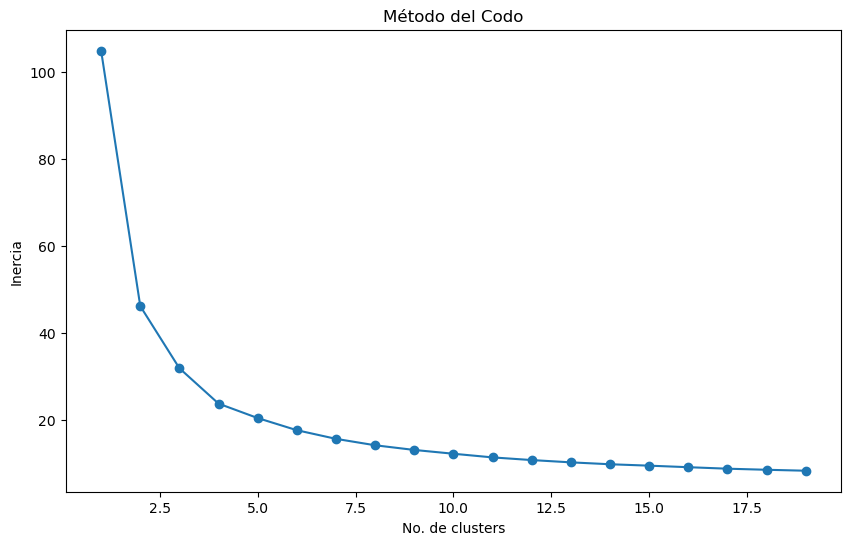

In [102]:
inercia = []
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                       max_iter = 300, n_init = 10)
    algoritmo.fit(data)

    inercia.append(algoritmo.inertia_)

plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

Tomaremos 5 como valor optimo de K

In [103]:
## Se aplica el algoritmo de clustering
algoritmo = KMeans(n_clusters = 5, init = 'k-means++',
                   max_iter = 300, n_init = 10)

#Se entrena el algoritmo
algoritmo.fit(data)

#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

### Aplicamos reducción de dimensionalidad

In [104]:
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(data)
pca = modelo_pca.transform(data)

### Creamos un Data frame para observar la relación de los componentes con las diferentes variables
### Después observamos el porcentaje de información que contiene con respecto al data frame original

In [105]:
dt_components=pd.DataFrame(modelo_pca.components_, columns=data.columns)
dt_components

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.48229,0.026695,0.016972,0.131282,0.004349,-0.039887,-0.501061,0.053595,0.176729,0.033646,0.600186,0.317849
1,-0.12725,-0.002490,-0.010397,-0.033835,-0.001281,0.962048,-0.237800,-0.004708,-0.008156,-0.002890,-0.017497,-0.007629


In [106]:
np.cumsum(modelo_pca.explained_variance_ratio_)

array([0.76128732, 0.93982603])

Este data set basado en PCA contiene un 94% de la información del original, por lo que podemos utilizarlo perfectamente para dimensionar y explicar los diferentes clusters y sus comportamientos junto a las diferentes variables por las dos dimensiones que hemos creado.

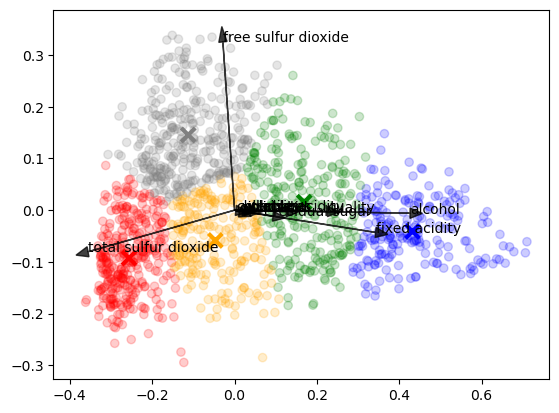

In [136]:
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster,
            marker = 'o',alpha = 0.2)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black',
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black',
             alpha=1)

plt.show()

### Conclusiones:
En cuanto a estos clusters podemos ver de manera bien definida como se comportan con respecto a las dimensiones.
Tambié podemos ver qué variables guardan correlación con las dimensiones, siendo así podemos decir:
 - **Dimension 1**: alcohol, fixed acidity, quality y ph guardan una relación positiva, mientras que total sulfur dioxide la guarda de manera totalmente negativa.
 Esto nos puede decir que los clusters situados a la derecha son de mejor calidad, y que los que están a la izquierda de peor calidad, al igual que los vectores que pueden ser indicadores de lo mismo.
 - **Dimension 2** free sulfur dioxide guarda una relación positiva con la segunda dimensión, y por lo que podemos ver, el cluster de color gris también, esta dimensioón no guarda relación directa con ninguna de las demás variables, por lo que esto puede ser una carácterística a parte de los vinos.